In [1]:
import matplotlib.pyplot as plt
from numpy import arange, zeros
import numpy as np
from pathlib import Path
from os import listdir
from os.path import splitext
import ipywidgets as widgets
from IPython.display import display
from dependencies import auto_correlation, cross_correlation
%matplotlib widget

        
def on_change_time_lag(change):
    with out_1:
        texts2 = [[], []] # X(sequence) and Y(ecg signal) time lagged value
        texts2[0] = texts1[0]
        texts2[1] = zeros(len(texts1[1]))
        time_lag = select_time_lag.get_interact_value()
        if time_lag > 0:
            for x in range(time_lag, len(texts2[1])):
                texts2[1][x] = texts1[1][x - time_lag]
        elif time_lag < 0:
            for x in range(abs(time_lag), len(texts2[1])):
                texts2[1][x - abs(time_lag)] = texts1[1][x]
        else:
            texts2[1] = texts1[1]
        fig2_ax1.clear()
        fig3_ax0.clear()
        fig2_ax1.plot(texts2[0], texts2[1], color="green")
        fig3_ax0.plot([x - (len(texts0[0]))//2 for x in texts0[0]], cross_correlation("normal", texts0[1], texts2[1]), label="Correlated Signal")
        

def on_button_select_first_signal_clicked(change):
    with open(select_first_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    texts0[0] = arange(len(text_file))
    try:
        texts0[1] = [float(x.replace("\n", "")) for x in text_file]
    except ValueError:
        print("Please select single column data file. File Read Error!")
        return
    
    with out_2:
        global plot1
        plot1.set_data(texts0[0], texts0[1])
        fig0_ax[0].set_xlim([0, len(texts0[0])])
        fig0_ax[0].set_ylim([min(texts0[1]), max(texts0[1])])
        
    first_signal_length.value = f"{len(texts0[0])}"
    with out_3:
        out_3.clear_output()
        print("Signal Selected!")   
         
        
def on_button_select_second_signal_clicked(change):
    with open(select_second_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    texts1[0] = arange(len(text_file))
    try:
        texts1[1] = [float(x.replace("\n", "")) for x in text_file]
    except ValueError:
        print("Please select single column data file. File Read Error!")
        return
    
    with out_2:
        global plot2
        plot2.set_data(texts1[0], texts1[1])
        fig0_ax[1].set_xlim([0, len(texts1[0])])
        fig0_ax[1].set_ylim([min(texts1[1]), max(texts1[1])])
        
    second_signal_length.value = f"{len(texts1[0])}"
    with out_4:
        out_4.clear_output()
        print("Signal Selected!")    

Output()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
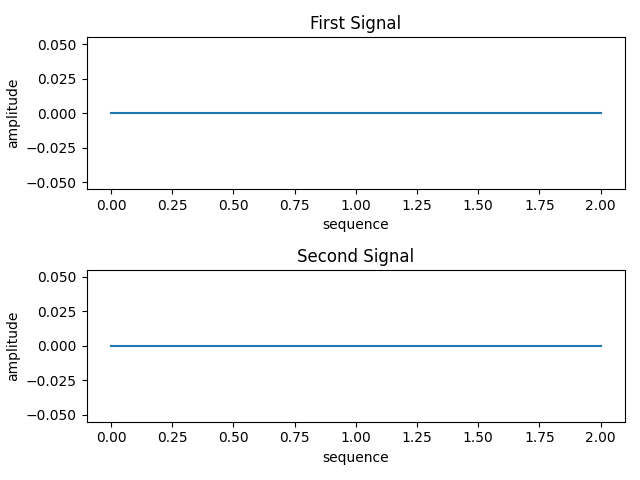

In [2]:
texts0 = [[], []] # X(sequence) and Y(ecg signal) value
texts1 = [[], []] # X(sequence) and Y(ecg signal) value


files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".txt":
        temp.append(file)
files = temp


select_first_signal = widgets.Select(
    options=files,
    description='Select First File:',
    disabled=False
)
first_signal_length = widgets.Text(value='0', disabled=True)
button_select_first_signal = widgets.Button(description='Select Signal')
button_select_first_signal.on_click(on_button_select_first_signal_clicked)


select_second_signal = widgets.Select(
    options=files,
    description='Select Second File:',
    disabled=False
)
second_signal_length = widgets.Text(value="0", disabled=True)
button_select_second_signal = widgets.Button(description='Select Signal')
button_select_second_signal.on_click(on_button_select_second_signal_clicked)


out_1 = widgets.Output()
with out_1:
    print("Please select the same data length for first and second signal")
out_2 = widgets.Output()
with out_2:
    fig0, fig0_ax = plt.subplots(nrows=2, ncols=1)
    fig0_ax[0].set(xlabel="sequence", ylabel="amplitude", title="First Signal")
    plot1, = fig0_ax[0].plot([0,1,2], [0,0,0])
    fig0_ax[1].set(xlabel="sequence", ylabel="amplitude", title="Second Signal")
    plot2, = fig0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
    
out_3 = widgets.Output()
out_4 = widgets.Output()


vertical_box_1 = widgets.VBox([select_first_signal, first_signal_length, button_select_first_signal, out_3])
vertical_box_2 = widgets.VBox([select_second_signal, second_signal_length, button_select_second_signal, out_4])
horizontal_box = widgets.HBox([vertical_box_1, vertical_box_2, out_2])
display(out_1, horizontal_box)



IntSlider(value=0, continuous_update=False, description='Time Lag:', max=3290, min=-3291)

Output()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
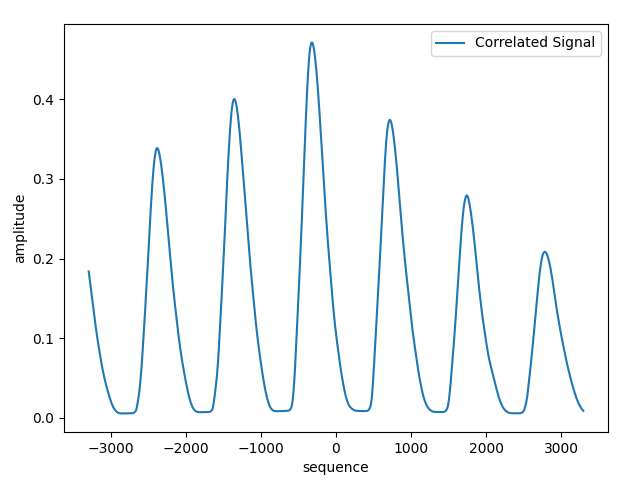

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
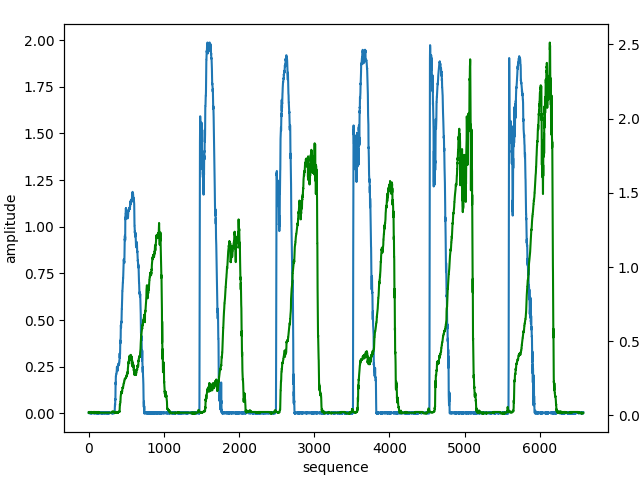

In [3]:
select_time_lag = widgets.IntSlider(
    value=0,
    min=(-len(texts1[0])//2),
    max=(len(texts1[0])//2),
    step=1,
    description='Time Lag:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

out = widgets.Output()

display(select_time_lag, out)
select_time_lag.observe(on_change_time_lag)

fig2 = plt.figure()
fig2_ax0 = fig2.add_axes([0.1,0.1,0.85,0.85], xlabel="sequence", ylabel="amplitude")
fig2_ax0.plot(texts0[0], texts0[1])
fig2_ax1 = fig2_ax0.twinx()
fig2_ax1.plot(texts1[0], texts1[1], color="green")
fig2_ax1.set_ylabel(ylabel="amplitude")

fig3 = plt.figure()
fig3_ax0 = fig3.add_axes([0.1,0.1,0.85,0.85], xlabel="sequence", ylabel="amplitude")
fig3_ax0.plot([x - (len(texts0[0]))//2 for x in texts0[0]], cross_correlation("normal", texts0[1], texts1[1]), label="Correlated Signal")
fig3_ax0.legend()
plt.show()